# Import Required Libraries
Import the necessary libraries, including pandas, numpy, and matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting for matplotlib
%matplotlib inline

# Load the Dataset
Load the dataset from final_data.xlsx using pandas.

In [2]:
# Load the Dataset
df = pd.read_excel('final_data.xlsx')

# Display the first few rows of the dataframe to ensure it loaded correctly
df.head()

,ID,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,DESCRIPTION,CWE-ID,Operating_System,Software_Component,Version,Impact,Affected_Hardware,Network_Requirements,Affected_Protocols,Authentication_Required,Privileges_Required,User_Interaction_Required,Vendor
0,1,CVE-1999-0001,NaN,5.0,MEDIUM,ip_input.c in BSD-derived TCP/IP implementatio...,CWE-20,BSD-derived,ip_input.c,NaN,denial of service (crash or hang),NaN,remote,TCP/IP,NaN,NaN,NaN,NaN
1,2,CVE-1999-0002,NaN,10.0,HIGH,Buffer overflow in NFS mountd gives root acces...,CWE-119,Linux,NFS mountd,NaN,root access,NaN,remote,NFS,NaN,NaN,NaN,NaN
2,3,CVE-1999-0003,NaN,10.0,HIGH,Execute commands as root via buffer overflow i...,NVD-CWE-Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,CVE-1999-0004,NaN,5.0,MEDIUM,"MIME buffer overflow in email clients, e.g. So...",NVD-CWE-Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,CVE-1999-0005,NaN,10.0,HIGH,Arbitrary command execution via IMAP buffer ov...,NVD-CWE-Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Display Basic Information
Display the first few rows, data types, and summary of the dataset.

In [3]:
# Display the data types of each column
df.dtypes

# Display a summary of the dataframe
df.describe(include='all')

,ID,CVE-ID,CVSS-V3,CVSS-V2,SEVERITY,DESCRIPTION,CWE-ID,Operating_System,Software_Component,Version,Impact,Affected_Hardware,Network_Requirements,Affected_Protocols,Authentication_Required,Privileges_Required,User_Interaction_Required,Vendor
count,11499.000000,11499,3027.000000,11498.000000,11498,11499,11499,2348,9821,7607,9689,219,7472,1519,1703,668,2402,6507
unique,NaN,11320,NaN,NaN,4,11221,125,218,5652,4142,2127,186,33,276,5,141,15,1003
top,NaN,CVE-2021-0516,NaN,NaN,MEDIUM,"WebKit, as used in Apple iTunes before 10.2 on...",NVD-CWE-Other,Windows,Android,Android-11,denial of service,USB flash drives,remote,HTTP,Yes,System execution privileges,No,Microsoft
freq,NaN,3,NaN,NaN,5275,43,4341,678,179,175,1088,9,5803,530,1105,108,1420,1135
mean,5750.000000,NaN,6.884572,6.137415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3319.619707,NaN,1.498648,2.201155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,2.300000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2875.500000,NaN,5.500000,4.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5750.000000,NaN,7.100000,6.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8624.500000,NaN,7.800000,7.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Handle Missing Values
Identify and handle missing values in the dataset.

In [4]:
# Identify missing values in the dataset
missing_values = df.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
missing_columns

# Handle missing values by filling them with the mean of the numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_filled = df.copy()
df_filled[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Verify that there are no more missing values
missing_values_after = df_filled.isnull().sum()
missing_values_after

ID                               0
CVE-ID                           0
CVSS-V3                          0
CVSS-V2                          0
SEVERITY                         1
DESCRIPTION                      0
CWE-ID                           0
Operating_System              9151
Software_Component            1678
Version                       3892
Impact                        1810
Affected_Hardware            11280
Network_Requirements          4027
Affected_Protocols            9980
Authentication_Required       9796
Privileges_Required          10831
User_Interaction_Required     9097
Vendor                        4992
dtype: int64

# Descriptive Statistics
Generate descriptive statistics for the dataset.

In [5]:
# Descriptive Statistics

# Generate descriptive statistics for the dataset
descriptive_stats = df_filled.describe()

# Display the descriptive statistics
descriptive_stats

,ID,CVSS-V3,CVSS-V2
count,11499.000000,11499.000000,11499.000000
mean,5750.000000,6.884572,6.137415
std,3319.619707,0.768817,2.201059
min,1.000000,2.300000,0.000000
25%,2875.500000,6.884572,4.600000
50%,5750.000000,6.884572,6.200000
75%,8624.500000,6.884572,7.500000
max,11499.000000,10.000000,10.000000


# Data Visualization
Create visualizations such as histograms, box plots, and scatter plots to explore the data.

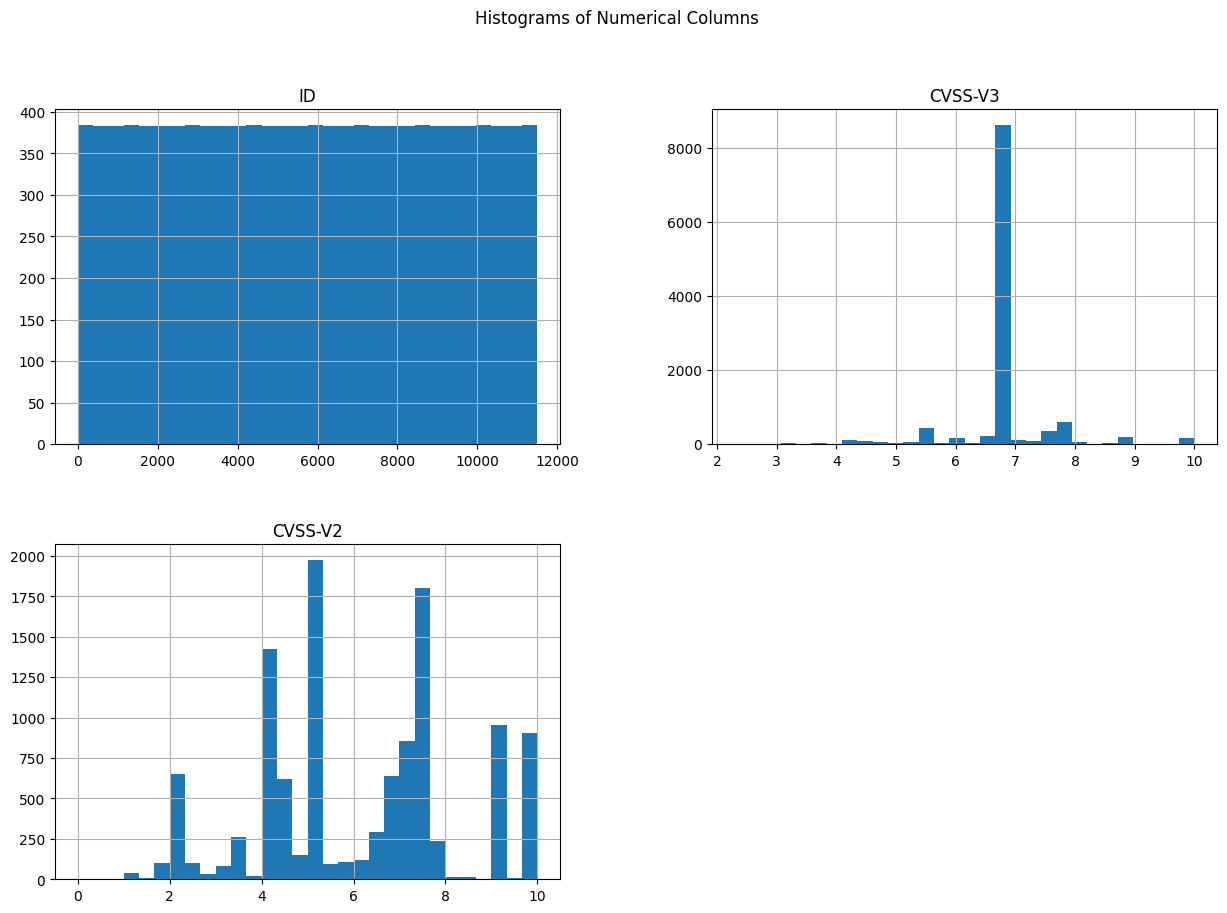

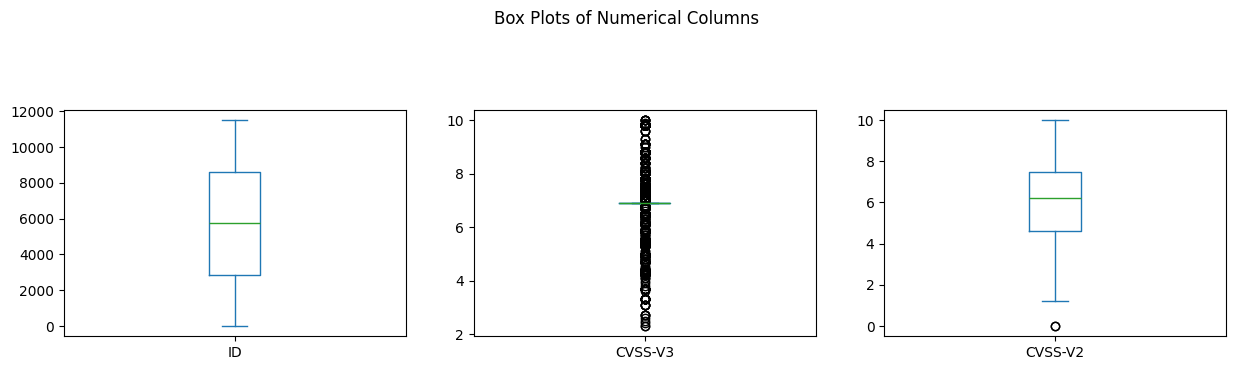

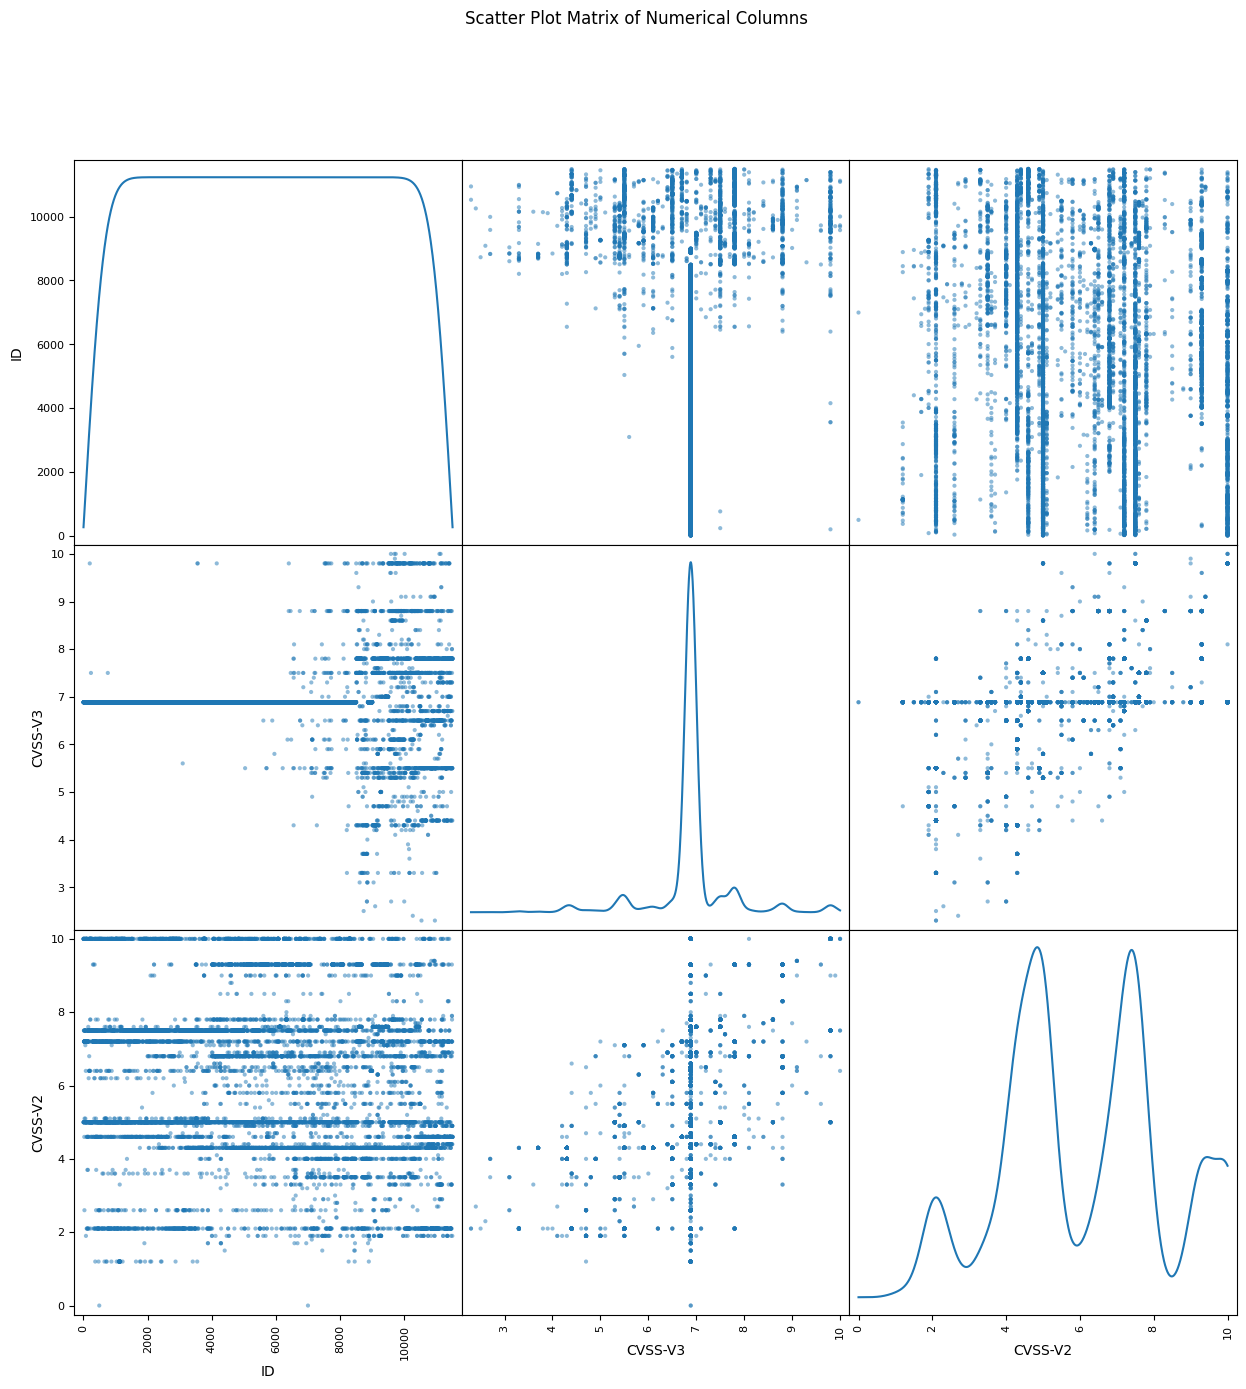

In [6]:
# Data Visualization

# Histogram for each numerical column
df_filled.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

# Box plot for each numerical column
df_filled.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), title='Box Plots of Numerical Columns')
plt.suptitle('Box Plots of Numerical Columns')
plt.show()

# Scatter plot matrix to explore relationships between numerical columns
pd.plotting.scatter_matrix(df_filled, figsize=(15, 15), diagonal='kde')
plt.suptitle('Scatter Plot Matrix of Numerical Columns')
plt.show()

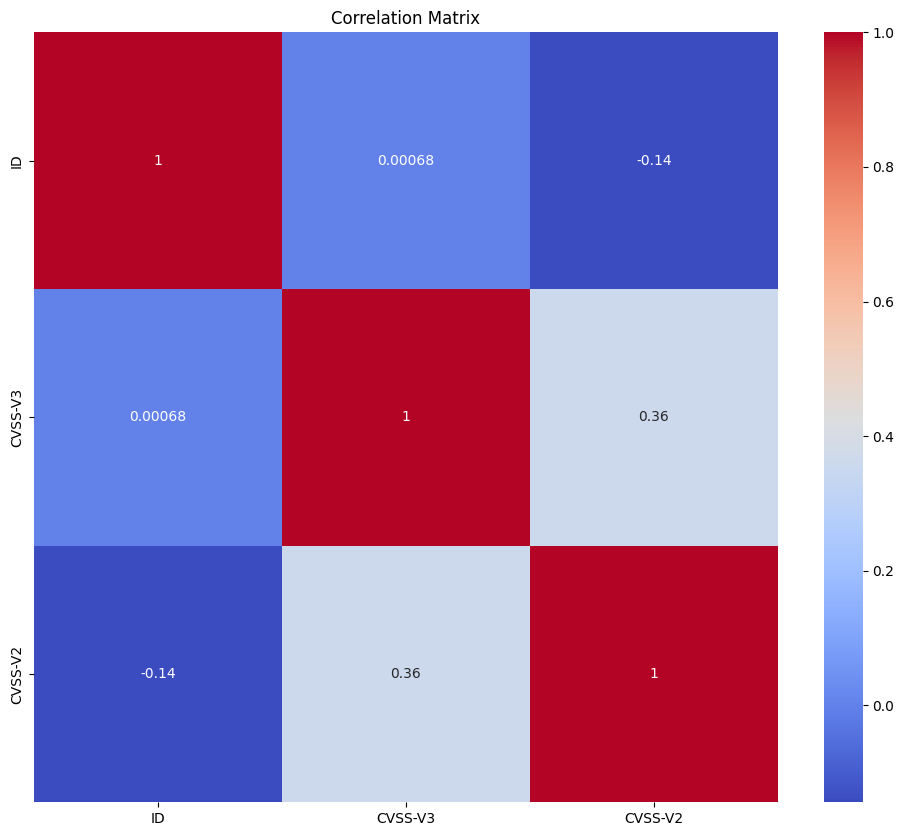

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already loaded the data into a pandas DataFrame named 'df_filled'

# Select only the numeric columns
numeric_cols = df_filled.select_dtypes(include='number').columns

# 1. Heatmap to visualize the correlation matrix for the numeric columns
plt.figure(figsize=(12, 10))
cor = df_filled[numeric_cols].corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

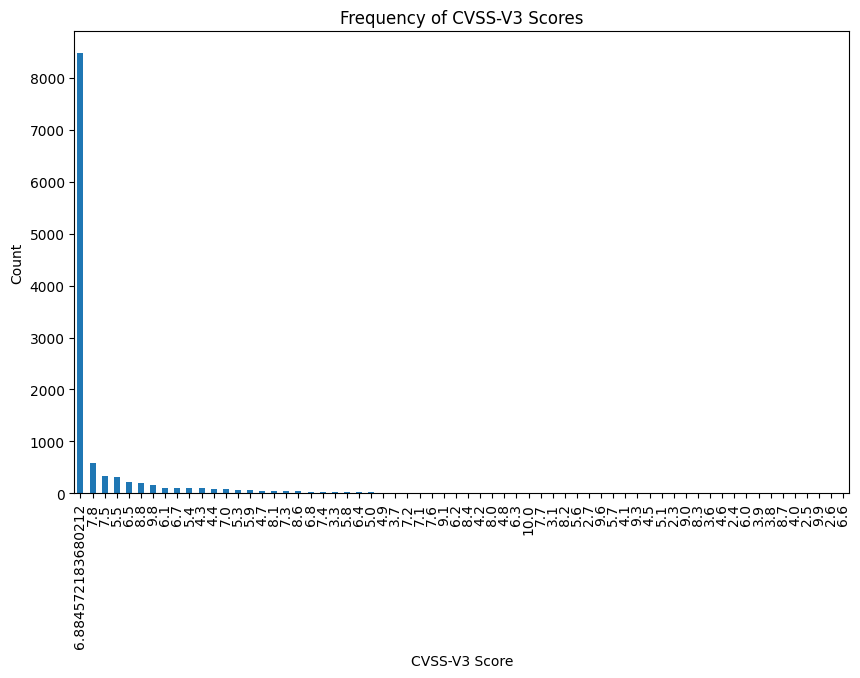

In [8]:
# 2. Bar plot to show the frequency of different CVSS-V3 scores
plt.figure(figsize=(10, 6))
df_filled['CVSS-V3'].value_counts().plot(kind='bar')
plt.title('Frequency of CVSS-V3 Scores')
plt.xlabel('CVSS-V3 Score')
plt.ylabel('Count')
plt.show()

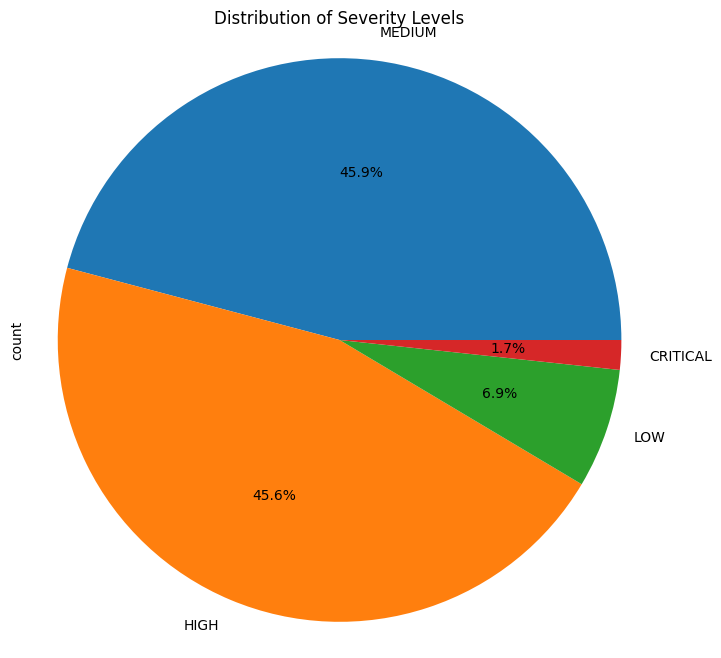

In [9]:
# 3. Pie chart to show the distribution of different severity levels
plt.figure(figsize=(8, 8))
df_filled['SEVERITY'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Severity Levels')
plt.axis('equal')
plt.show()

In [ ]:
# 4. Stacked bar plot to show the distribution of software components across operating systems
plt.figure(figsize=(12, 8))
software_os = df_filled.groupby(['Operating_System', 'Software_Component']).size().unstack(fill_value=0)
software_os.plot(kind='bar', stacked=True)
plt.title('Software Components across Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.legend(title='Software Component', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# 5. Line plot to show the trend of CVE IDs over time (assuming you have a 'year' column)
plt.figure(figsize=(12, 6))
df_filled.groupby('year')['CVE-ID'].count().plot(kind='line')
plt.title('Trend of CVE IDs over Time')
plt.xlabel('Year')
plt.ylabel('Count of CVE IDs')
plt.show()